['Graph 5', 0.6636436912251334, array([[ 0.27311381, -0.98766562],
       [ 0.91194032,  0.15175875],
       [ 1.04257981,  0.31441714],
       [ 0.45895228,  0.85648153],
       [ 0.92570562,  1.5153914 ],
       [-0.23317999, -0.72338811],
       [-0.08751392,  0.35827234],
       [-0.67373401, -0.01553184],
       [ 0.45391069,  0.24660181],
       [-0.95794042,  0.67480467],
       [ 0.89337742,  0.07178855],
       [ 0.19366057, -0.10510714],
       [-1.35056942, -0.17006983],
       [-0.28818065,  0.73905571],
       [-1.06950447, -0.26789057],
       [ 0.33138279, -0.17735715],
       [-0.37087434, -0.27847837],
       [ 0.77671761, -0.29587032],
       [ 0.3719933 ,  0.14104249],
       [-1.00845027,  0.56133542],
       [-0.44616661, -0.01718885]])]


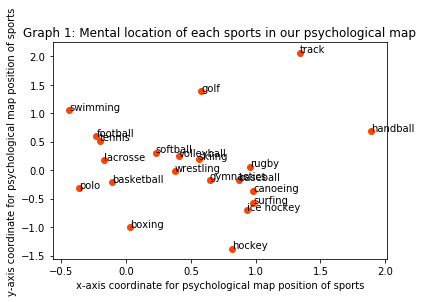

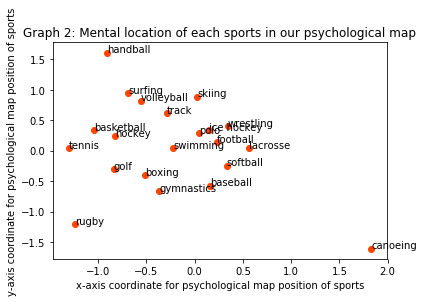

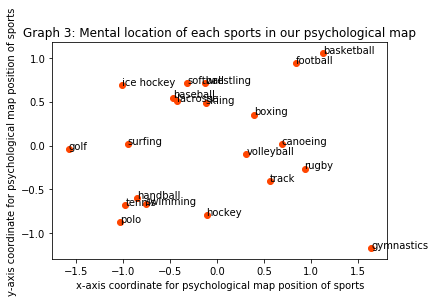

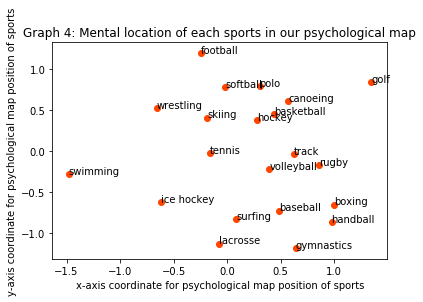

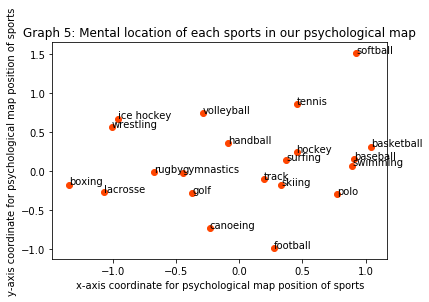

In [58]:
import numpy
import statistics
from math import sqrt
import matplotlib.pyplot as plt
from math import log



# what each data point is called:
names = ["football","baseball","basketball","tennis","softball","canoeing","handball","rugby","hockey","ice hockey","swimming","track","boxing","volleyball","lacrosse","skiing","golf","polo","surfing","wrestling","gymnastics"]


 # load the csv provided on bcourses
similarities = numpy.loadtxt(open("simil.csv", "rb"), delimiter=",", skiprows=1)

distances = 1 - similarities #This is to find the distances between each possible pair of sports in the given matrix.

D = 2 # How many dimensions we are going to use
N = distances.shape[0] # the number of items
assert(distances.shape[1] == N and N==len(names)) # be sure we loaded as many items as we have names for

def dist(a,b):
    # Compute the Euclidean distance between two locations (numpy arrays) a and b
    # Thus, dist(pos[1], pos[2]) gives the distance between the locations for items 1 and 2

    return numpy.linalg.norm(a-b)

def stress(p):
    # Take a matrix of positions (called here "p") and return the stress
    stress = 0
    # This loop helps to eliminate the duplicate pairs in similarities as well as same sports pair like (football, football)
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                # stress += (distances[row, col] - dist(numpy.array([p[row, 0], p[row, 1]]), numpy.array([p[col, 0], p[col, 1]]))) ** 2
                stress += (distances[row, col] - dist(p[row], p[col])) ** 2
    return stress

def add_delta(p, i, d, delta):
    # This is a helper function that will make a new vector which is the same as p (a position matrix), except that
    # p[i,d] has been increased by delta (which may be positive or negative)
    v = numpy.array(p)
    v[i, d] += delta
    return v

def compute_gradient(p, i, d, delta = 0.001):
    # compute the gradient of the stress function with respect to the [i,d] entry of a position matrix p
    # (e.g. the derivative of stress with respect to the i'th coordinate of the x'th dimension)
    # Here, to compute numerically, you can use the fact that
    # f'(x) = (f(x+delta)-f(x-delta))/(2 delta) as delta -> 0

    return (stress(add_delta(p, i, d, delta)) - stress(add_delta(p, i, d, -delta))) / (2 * delta)


def compute_full_gradient(p):
    # Numerically compute the full gradient of stress at a position p
    # This should return a matrix whose elements are the gradient of stress at p with respect to each [i,d] coordinate
    i, d = p.shape
    empty_array = numpy.zeros([i, d])
    for a in range(0, i):
        for b in range(0, d):
            empty_array[a, b] = compute_gradient(p, a, b)
    return empty_array

# # Pick a position for each point. Note this is an NxD matrix
# # so that pos[11,1] is the y coordinate for the 11th item
# # and pos[11] is a (row) vector for the position of the 11th item
pos = numpy.random.normal(0.0,1.0,size=(N,D))

# Now go through and adjust the position to minimize the stress
def steps_runner(p, iterations):
    for steps in range(iterations):
        learning_rate = 0.001
        p = p - learning_rate * compute_full_gradient(p)
        #print(stress(p))
        individual_stress = stress(p) / (21*10)
    
    return individual_stress, p

# generates all possible pairs of sports excluding same sports or duplicate pair from the excel file
def pair_generator(names):
    paired_names = []
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                paired_names.append([names[row], names[col]])
    return paired_names

# generates the pairwise distances for psychological dist & mds dist
def pair_wise_distances(distances, p):
    psychological_distances = []
    mds_distances = []
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                psychological_distances.append(distances[row, col])
                mds_distances.append(dist(p[row], p[col]))
    return psychological_distances, mds_distances

# this is to calculate individual stress value for each sports pair.
individual_stress1, final_position_matrix1 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 8)
individual_stress2, final_position_matrix2 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 8)
individual_stress3, final_position_matrix3 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 8)
individual_stress4, final_position_matrix4 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 8)
individual_stress5, final_position_matrix5 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 8)

candidates = [["Graph 1", individual_stress1, final_position_matrix1], ["Graph 2", individual_stress2, final_position_matrix2], ["Graph 3", individual_stress3, final_position_matrix3], ["Graph 4", individual_stress4, final_position_matrix4], ["Graph 5", individual_stress5, final_position_matrix5]]



# Finds the best MDS among all the MDS's by finding the one with the minimum stress value. Prints its Graph# and list of positions
def best_finder(list_p): 
    print(min(list_p, key=lambda x: x[1]))

# this separates final position matrix into x and y coordinates. 

# Graph 1
x1, y1 = [each[0] for each in final_position_matrix1], [each[1] for each in final_position_matrix1] 
fig1, ax1 = plt.subplots()
ax1.scatter(x1, y1, color='orangered')

for i, txt in enumerate(names):
    ax1.annotate(txt, (x1[i], y1[i]))
    
plt.xlabel('x-axis coordinate for psychological map position of sports')
plt.ylabel('y-axis coordinate for psychological map position of sports')
plt.title('Graph 1: Mental location of each sports in our psychological map')

# Graph 2
x2, y2 = [each[0] for each in final_position_matrix2], [each[1] for each in final_position_matrix2] 
fig2, ax2 = plt.subplots()
ax2.scatter(x2, y2, color='orangered')

for i, txt in enumerate(names):
    ax2.annotate(txt, (x2[i], y2[i]))
    
plt.xlabel('x-axis coordinate for psychological map position of sports')
plt.ylabel('y-axis coordinate for psychological map position of sports')
plt.title('Graph 2: Mental location of each sports in our psychological map')

# Graph 3    
x3, y3 = [each[0] for each in final_position_matrix3], [each[1] for each in final_position_matrix3] 
fig3, ax3 = plt.subplots()
ax3.scatter(x3, y3, color='orangered')

for i, txt in enumerate(names):
    ax3.annotate(txt, (x3[i], y3[i]))
    
plt.xlabel('x-axis coordinate for psychological map position of sports')
plt.ylabel('y-axis coordinate for psychological map position of sports')
plt.title('Graph 3: Mental location of each sports in our psychological map')

# Graph 4
x4, y4 = [each[0] for each in final_position_matrix4], [each[1] for each in final_position_matrix4] 
fig4, ax4 = plt.subplots()
ax4.scatter(x4, y4, color='orangered')

for i, txt in enumerate(names):
    ax4.annotate(txt, (x4[i], y4[i]))

plt.xlabel('x-axis coordinate for psychological map position of sports')
plt.ylabel('y-axis coordinate for psychological map position of sports')
plt.title('Graph 4: Mental location of each sports in our psychological map')
    
# Graph 5
x5, y5 = [each[0] for each in final_position_matrix5], [each[1] for each in final_position_matrix5] 
fig5, ax5 = plt.subplots()
ax5.scatter(x5, y5, color='orangered')

for i, txt in enumerate(names):
    ax5.annotate(txt, (x5[i], y5[i]))

best_finder(candidates)
    
plt.xlabel('x-axis coordinate for psychological map position of sports')
plt.ylabel('y-axis coordinate for psychological map position of sports')
plt.title('Graph 5: Mental location of each sports in our psychological map')

plt.savefig('foo.png')
plt.show()

# fig, axs = plt.subplots(1,2)

# df['korisnika'].plot(ax=axs[0])
# df['osiguranika'].plot(ax=axs[1])


#plot(x, y, marker = "o")



# 1

>> Three ways: 
- I could just subtract every matrix item from 1 to get the distance for each pair.
- I could also do 1 / similarities - This one is error prone because when we have similarities of 0, we will have Division By Zero.
- I could also do log(1) - log(similarities) - This one would result in the differences of distances in smaller initial stress values because of the nature of log to decrease numbers in magnitude, but since the initial stress value is small, it would harder for the downhill gradient to converge. 

>> I'm choosing the first one because the similarities are given in the range of 0 through 1 and difference and using the difference between those similarities is a very reasonable and intuitive way to deduce it as a distance between the two. The higher the similarities, the lower the distance and it's very logical to consider the subtraction of the two similarities as the distance between the two sports. 

# 2 

- Yes, the results agree with my intuition about how this domain might be organized. Reason: If I look at the original psychological distances in Excel file, these data plotted on the graph closely correspond to the similarities between different pairs of sports. For example, if I look at the coordinate of football & volleyball(similarity: 0.93), its distance is visibly closer than the distance b/t football & baseball(similarity: 0.19), thus accurately reflecting the similarity values on the coordinate data and indicating football & volleyball is more similar than football & baseball. For another example, Boxing & Wrestling(0.78)'s distance is much closer than the distance b/t Boxing & Track(0.07), which again shows that this resulting coordinate plot is strongly correlated with the similarities data. Thus, although this coordinate may not be perfect, but it is accurate enough to give us an idea of mental coordinates for resemblance of each sports.

In [ ]:
import numpy
import statistics
from math import sqrt
import matplotlib.pyplot as plt
from math import log

# what each data point is called:
names = ["football","baseball","basketball","tennis","softball","canoeing","handball","rugby","hockey","ice hockey","swimming","track","boxing","volleyball","lacrosse","skiing","golf","polo","surfing","wrestling","gymnastics"]


 # load the csv provided on bcourses
similarities = numpy.loadtxt(open("simil.csv", "rb"), delimiter=",", skiprows=1)

distances = 1 - similarities #This is to find the distances between each possible pair of sports in the given matrix.

D = 2 # How many dimensions we are going to use
N = distances.shape[0] # the number of items
assert(distances.shape[1] == N and N==len(names)) # be sure we loaded as many items as we have names for

def dist(a,b):
    # Compute the Euclidean distance between two locations (numpy arrays) a and b
    # Thus, dist(pos[1], pos[2]) gives the distance between the locations for items 1 and 2

    return numpy.linalg.norm(a-b)

def stress(p):
    # Take a matrix of positions (called here "p") and return the stress
    stress = 0
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                # stress += (distances[row, col] - dist(numpy.array([p[row, 0], p[row, 1]]), numpy.array([p[col, 0], p[col, 1]]))) ** 2
                stress += (distances[row, col] - dist(p[row], p[col])) ** 2
    return stress

def add_delta(p, i, d, delta):
    # This is a helper function that will make a new vector which is the same as p (a position matrix), except that
    # p[i,d] has been increased by delta (which may be positive or negative)
    v = numpy.array(p)
    v[i, d] += delta
    return v

def compute_gradient(p, i, d, delta = 0.001):
    # compute the gradient of the stress function with respect to the [i,d] entry of a position matrix p
    # (e.g. the derivative of stress with respect to the i'th coordinate of the x'th dimension)
    # Here, to compute numerically, you can use the fact that
    # f'(x) = (f(x+delta)-f(x-delta))/(2 delta) as delta -> 0

    return (stress(add_delta(p, i, d, delta)) - stress(add_delta(p, i, d, -delta))) / (2 * delta)


def compute_full_gradient(p):
    # Numerically compute the full gradient of stress at a position p
    # This should return a matrix whose elements are the gradient of stress at p with respect to each [i,d] coordinate
    i, d = p.shape
    empty_array = numpy.zeros([i, d])
    for a in range(0, i):
        for b in range(0, d):
            empty_array[a, b] = compute_gradient(p, a, b)
    return empty_array

# # Pick a position for each point. Note this is an NxD matrix
# # so that pos[11,1] is the y coordinate for the 11th item
# # and pos[11] is a (row) vector for the position of the 11th item
pos = numpy.random.normal(0.0,1.0,size=(N,D))

# Now go through and adjust the position to minimize the stress
def steps_runner(p, iterations):
    for steps in range(iterations):
        learning_rate = 0.001
        p = p - learning_rate * compute_full_gradient(p)
        #print(stress(p))
    
    return stress(p)

# generates all possible pairs of sports excluding same sports or duplicate pair from the excel file
def pair_generator(names):
    paired_names = []
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                paired_names.append([names[row], names[col]])
    return paired_names

# generates the pairwise distances for psychological dist & mds dist
def pair_wise_distances(distances, p):
    psychological_distances = []
    mds_distances = []
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                psychological_distances.append(distances[row, col])
                mds_distances.append(dist(p[row], p[col]))
    return psychological_distances, mds_distances

#runs the steps loops which follows the downhill gradient to find positions that minimize the stress.

def position_runner(p):
    for steps in range(iterations):
        learning_rate = 0.001
        p = p - learning_rate * compute_full_gradient(p)
        #print(stress(p))
    return p

final_position_matrix = steps_runner(pos, 100)

z, p = 
x, y = pair_wise_distances(distances, final_position_matrix)

#this is to calculate individual stress value for each sports pair.
# individual_stress = final_stress_sum / (21*10) 


# this separates final position matrix into x and y coordinates. 
# x, y = [each[0] for each in final_position_matrix], [each[1] for each in final_position_matrix] 

fig, ax = plt.subplots()
ax.scatter(x, y, color='orangered')

# for i, txt in enumerate(names):
#     ax.annotate(txt, (x[i], y[i]))

#plt.plot(x, y, color='orangered', linewidth=4)
plt.xlabel('Psychological Distances')
plt.ylabel('MDS Distances')
plt.title('Psychological Distances vs MDS Distances Comparison')

plt.savefig('foo.png')
plt.show()

#plot(x, y, marker = "o")



# 3a

- Whether it looks good or bad would be based on how closely the scatter plot would align with the y = x, which is straight line graph with a slope of 1, because when plots follow the line of y = x, that means there's a very little discrepancy b/t the MDS found and people's reported distances. In other words, MDS finds the relative coordinates of each sports in our mental complex and if we get the same or even similar distances as originally reported distances, that means our MDS is reliable. Looking at the graph above, although it doesn't fall within the strictly y=x line, the general outline trend is that the scatter plot follows the y = x line as a whole with some outliers. Therefore, I can say this is a good graph.  

In [ ]:
import numpy
import statistics
from math import sqrt
import matplotlib.pyplot as plt
from math import log

# what each data point is called:
names = ["football","baseball","basketball","tennis","softball","canoeing","handball","rugby","hockey","ice hockey","swimming","track","boxing","volleyball","lacrosse","skiing","golf","polo","surfing","wrestling","gymnastics"]


 # load the csv provided on bcourses
similarities = numpy.loadtxt(open("simil.csv", "rb"), delimiter=",", skiprows=1)

distances = 1 - similarities #This is to find the distances between each possible pair of sports in the given matrix.

D = 2 # How many dimensions we are going to use
N = distances.shape[0] # the number of items
assert(distances.shape[1] == N and N==len(names)) # be sure we loaded as many items as we have names for

def dist(a,b):
    # Compute the Euclidean distance between two locations (numpy arrays) a and b
    # Thus, dist(pos[1], pos[2]) gives the distance between the locations for items 1 and 2

    return numpy.linalg.norm(a-b)

def stress(p):
    # Take a matrix of positions (called here "p") and return the stress
    stress = 0
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                # stress += (distances[row, col] - dist(numpy.array([p[row, 0], p[row, 1]]), numpy.array([p[col, 0], p[col, 1]]))) ** 2
                stress += (distances[row, col] - dist(p[row], p[col])) ** 2
    return stress

def add_delta(p, i, d, delta):
    # This is a helper function that will make a new vector which is the same as p (a position matrix), except that
    # p[i,d] has been increased by delta (which may be positive or negative)
    v = numpy.array(p)
    v[i, d] += delta
    return v

def compute_gradient(p, i, d, delta = 0.001):
    # compute the gradient of the stress function with respect to the [i,d] entry of a position matrix p
    # (e.g. the derivative of stress with respect to the i'th coordinate of the x'th dimension)
    # Here, to compute numerically, you can use the fact that
    # f'(x) = (f(x+delta)-f(x-delta))/(2 delta) as delta -> 0

    return (stress(add_delta(p, i, d, delta)) - stress(add_delta(p, i, d, -delta))) / (2 * delta)


def compute_full_gradient(p):
    # Numerically compute the full gradient of stress at a position p
    # This should return a matrix whose elements are the gradient of stress at p with respect to each [i,d] coordinate
    i, d = p.shape
    empty_array = numpy.zeros([i, d])
    for a in range(0, i):
        for b in range(0, d):
            empty_array[a, b] = compute_gradient(p, a, b)
    return empty_array

# # Pick a position for each point. Note this is an NxD matrix
# # so that pos[11,1] is the y coordinate for the 11th item
# # and pos[11] is a (row) vector for the position of the 11th item
pos = numpy.random.normal(0.0,1.0,size=(N,D))

# Now go through and adjust the position to minimize the stress
def steps_runner(p, iterations):
    for steps in range(iterations):
        learning_rate = 0.001
        p = p - learning_rate * compute_full_gradient(p)
        #print(stress(p))
    
    return stress(p)

# generates all possible pairs of sports excluding same sports or duplicate pair from the excel file
def pair_generator(names):
    paired_names = []
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                paired_names.append([names[row], names[col]])
    return paired_names

# generates the pairwise distances for psychological dist & mds dist
def pair_wise_distances(distances, p):
    psychological_distances = []
    mds_distances = []
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                psychological_distances.append(distances[row, col])
                mds_distances.append(dist(p[row], p[col]))
    return psychological_distances, mds_distances

def iteration_evaluator(p):
    iterations = 100
    curr_stress = stress(p)
    stress_list = [[0, curr_stress]]
    theta = 9
    while True:
        curr_stress, prev_stress = steps_runner(p, iterations), curr_stress
        stress_list.append([iterations, curr_stress])
        print(curr_stress)
        if curr_stress < theta:
            return stress_list
        iterations += 100
        
def appropriate_steps_finder(p):
    num_pairs = 21 * 10
    curr_stress = stress(p) / num_pairs
    stress_list = [[0, curr_stress]]
    iteration = 1
    while True:
        learning_rate = 0.001
        p = p - learning_rate * compute_full_gradient(p)
        curr_stress, prev_stress = stress(p) / num_pairs, curr_stress
        if iteration % 100 == 0 or (iteration < 100 and iteration %10==0):
            stress_list.append([iteration, curr_stress])
            print(iteration)
        if iteration == 100:
            return stress_list
        iteration += 1

finder_result = appropriate_steps_finder(pos)
x = [s[0] for s in finder_result]
y = [s[1] for s in finder_result]

# fig, ax = plt.subplots()
# ax.scatter(x, y, color='orangered')

# for i, txt in enumerate(names):

#plt.plot(x, y, color='orangered', linewidth=4)
plt.xlabel('Number of Iterations')
plt.ylabel('Individual Stress Value for Each Sports Pair')
plt.title('Number of Iterations Vs. Stress Value for Each Pair of Sports')


plt.plot(x, y, color='orangered', marker="o")
plt.savefig('foo.png')





# 3b

- Ideal stress values are when they fall near 0. If I look at the graph, stress values starts to fall significantly within the first 100 iterations and the stress value starts to consistently plateau starting at 600~800 iterations standing at approximately 0.035. Thus, I can derive based on this graph that I would only need about 600~800 iterations to find the stress value close to minimum since there won't be any significant change of the stress value after 600~800 iterations. 

In [ ]:
import numpy
import statistics
from math import sqrt
import matplotlib.pyplot as plt
from math import log

# what each data point is called:
names = ["football","baseball","basketball","tennis","softball","canoeing","handball","rugby","hockey","ice hockey","swimming","track","boxing","volleyball","lacrosse","skiing","golf","polo","surfing","wrestling","gymnastics"]


 # load the csv provided on bcourses
similarities = numpy.loadtxt(open("simil.csv", "rb"), delimiter=",", skiprows=1)

distances = 1 - similarities #This is to find the distances between each possible pair of sports in the given matrix.

D = 2 # How many dimensions we are going to use
N = distances.shape[0] # the number of items
assert(distances.shape[1] == N and N==len(names)) # be sure we loaded as many items as we have names for

def dist(a,b):
    # Compute the Euclidean distance between two locations (numpy arrays) a and b
    # Thus, dist(pos[1], pos[2]) gives the distance between the locations for items 1 and 2

    return numpy.linalg.norm(a-b)

def stress(p):
    # Take a matrix of positions (called here "p") and return the stress
    stress = 0
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                # stress += (distances[row, col] - dist(numpy.array([p[row, 0], p[row, 1]]), numpy.array([p[col, 0], p[col, 1]]))) ** 2
                stress += (distances[row, col] - dist(p[row], p[col])) ** 2
    return stress

def add_delta(p, i, d, delta):
    # This is a helper function that will make a new vector which is the same as p (a position matrix), except that
    # p[i,d] has been increased by delta (which may be positive or negative)
    v = numpy.array(p)
    v[i, d] += delta
    return v

def compute_gradient(p, i, d, delta = 0.001):
    # compute the gradient of the stress function with respect to the [i,d] entry of a position matrix p
    # (e.g. the derivative of stress with respect to the i'th coordinate of the x'th dimension)
    # Here, to compute numerically, you can use the fact that
    # f'(x) = (f(x+delta)-f(x-delta))/(2 delta) as delta -> 0

    return (stress(add_delta(p, i, d, delta)) - stress(add_delta(p, i, d, -delta))) / (2 * delta)


def compute_full_gradient(p):
    # Numerically compute the full gradient of stress at a position p
    # This should return a matrix whose elements are the gradient of stress at p with respect to each [i,d] coordinate
    i, d = p.shape
    empty_array = numpy.zeros([i, d])
    for a in range(0, i):
        for b in range(0, d):
            empty_array[a, b] = compute_gradient(p, a, b)
    return empty_array

# # Pick a position for each point. Note this is an NxD matrix
# # so that pos[11,1] is the y coordinate for the 11th item
# # and pos[11] is a (row) vector for the position of the 11th item
pos = numpy.random.normal(0.0,1.0,size=(N,D))

# Now go through and adjust the position to minimize the stress
def steps_runner(p, iterations):
    for steps in range(iterations):
        learning_rate = 0.001
        p = p - learning_rate * compute_full_gradient(p)
        #print(stress(p))
    
    return stress(p)

# generates all possible pairs of sports excluding same sports or duplicate pair from the excel file
def pair_generator(names):
    paired_names = []
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                paired_names.append([names[row], names[col]])
    return paired_names

# generates the pairwise distances for psychological dist & mds dist
def pair_wise_distances(distances, p):
    psychological_distances = []
    mds_distances = []
    for row in range(0, 21):
        for col in range(0, 21):
            if col > row:
                psychological_distances.append(distances[row, col])
                mds_distances.append(dist(p[row], p[col]))
    return psychological_distances, mds_distances

def iteration_evaluator(p):
    iterations = 100
    curr_stress = stress(p)
    stress_list = [[0, curr_stress]]
    theta = 9
    while True:
        curr_stress, prev_stress = steps_runner(p, iterations), curr_stress
        stress_list.append([iterations, curr_stress])
        print(curr_stress)
        if curr_stress < theta:
            return stress_list
        iterations += 100
        
def appropriate_steps_finder(p):
    num_pairs = 21 * 10
    curr_stress = stress(p) / num_pairs
    stress_list = [[0, curr_stress]]
    iteration = 1
    while True:
        learning_rate = 0.001
        p = p - learning_rate * compute_full_gradient(p)
        curr_stress, prev_stress = stress(p) / num_pairs, curr_stress
        if iteration % 100 == 0 or (iteration < 100 and iteration %10==0):
            stress_list.append([iteration, curr_stress])
            print(iteration)
        if iteration == 100:
            return stress_list
        iteration += 1

def position_runner(p):
    for steps in range(iterations):
        learning_rate = 0.001
        p = p - learning_rate * compute_full_gradient(p)
        #print(stress(p))
    return p

finder_result = appropriate_steps_finder(pos)
x = [s[0] for s in finder_result]
y = [s[1] for s in finder_result]

# fig, ax = plt.subplots()
# ax.scatter(x, y, color='orangered')

# for i, txt in enumerate(names):

#plt.plot(x, y, color='orangered', linewidth=4)
plt.xlabel('Number of Iterations')
plt.ylabel('Individual Stress Value for Each Sports Pair')
plt.title('Number of Iterations Vs. Stress Value for Each Pair of Sports')


plt.plot(x, y, color='orangered', marker="o")
plt.savefig('foo.png')



# 4

- They are NOT same. The reason why they are not same is because each graph starts with a different random initial position to start the downhill gradient. Positions of each run with downhill gradient will be based on the previous position and if it starts out even with a slight position difference, then it can change the relatives positions of these psychological positions of sports. In other words, these psychological positions are not an absolute position but rather a relative positions that are only as far or as close from each other as there is difference and similarities.

In [ ]:
# Takes in the list of MDS's by argument, and finds the best MDS among all the MDS's by finding the one with the minimum stress value. Prints its Graph# and list of positions

individual_stress1, final_position_matrix1 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 800)
individual_stress2, final_position_matrix2 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 800)
individual_stress3, final_position_matrix3 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 800)
individual_stress4, final_position_matrix4 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 800)
individual_stress5, final_position_matrix5 = steps_runner(numpy.random.normal(0.0,1.0,size=(N,D)), 800)

candidates = [["Graph 1", individual_stress1, final_position_matrix1], ["Graph 2", individual_stress2, final_position_matrix2], ["Graph 3", individual_stress3, final_position_matrix3], ["Graph 4", individual_stress4, final_position_matrix4], ["Graph 5", individual_stress5, final_position_matrix5]]

def best_finder(list_p): 
    print(min(list_p, key=lambda x: x[1]))

# 5

- I would pick the "best" graph by comparing the stress values of each graph. Since the closer to 0 the stress value is, the better the graph is, I could basically choose the graph that has the minimum among 5 graphs. I carried out this task by simply implementing a function that takes in the list of labels, individual stress value, MDS matrices for all five graphs and finding the minimum stress of all and printing that graph's number, its stress value and its MDS scaled position matrix.